In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import pandas as pd
import math

In [14]:
def NPV(F:float=1000, C:float=100, rates:list=[]):
    time = len(rates)
    V_coupons = calc_coupons(C, rates, time)
    V_face = calc_f(F, rates, time)
    return V_coupons + V_face

def calc_f(F:float, rates:list, time:int):
    V_face = 1
    for r in rates:
        V_face *= ((1+r))
    return F/V_face

def calc_coupons(C: float, rates: list, time: int):
    V_coupons = [0]
    for t in range(time):
        V_coup = 1
        for r in rates[t:]:
            V_coup *= (1+r)
        V_coupons.append(C/V_coup)
    return sum(V_coupons)

def build_hist(array):
    n1 = int(1+3.3*np.log2(len(array)))
    bins = np.linspace((array.min()),(array.max()),n1)
    data = np.histogram(array, bins=bins)
    hist_dist = stats.rv_histogram(data)
    return hist_dist

def sample_hist(histogram, random_value):
    return histogram.ppf(random_value)

def plot_chist(array, color='g'):
    n1 = int(1+3.3*np.log2(len(array)))
    n, bins, patches = plt.hist(array, n1, cumulative=True, density=True, facecolor=color, alpha=0.75)

def plot_hist(array, color='g'):
    n1 = int(1+3.3*np.log2(len(array)))
    n, bins, patches = plt.hist(array, n1, cumulative=False, density=False, facecolor=color, alpha=0.75)

Problem 1 Hints: First you will need to edit the NPV, calc_f, and calc_coupons functions to accept an array of rates as opposed to a constant. Recall in class that it was pointed out that (1+r)^t is just (1+r) times itself t times. 
See the formulas we developed in class for more information about converting the constant value equations to variable rates.

Problem 2 Hints: The method for reading in the file and converting it into an array (main_int) is already set up for you. You will need to run the array through the histogram function to create a histogram object. The plotting tools will generate figures for you if needed. You will need to sample the histogram object to geneate the random array. Recall we used a random value from a uniform distribution to sample the histogram.   

In [60]:
#Work for problem two here please
rates = pd.read_csv('interest_rates.csv')
main_int = np.array(rates['Total'])/100
runs = 10000
years = 10
face = 1000
coupon = 35.68
histogram = build_hist(main_int)
vals = np.zeros(runs)
for j in range(runs):
    rates = np.zeros(years)
    for i in range(years):
        rates[i] = sample_hist(histogram, np.random.random())
    vals[j] = NPV(face, coupon, rates)
vals.mean()


1001.8476069945391

(array([  33.,  264.,  969., 2151., 2741., 2189., 1167.,  405.,   77.,
           4.]),
 array([ 910.91805819,  930.70535859,  950.49265899,  970.27995939,
         990.06725979, 1009.85456018, 1029.64186058, 1049.42916098,
        1069.21646138, 1089.00376178, 1108.79106218]),
 <BarContainer object of 10 artists>)

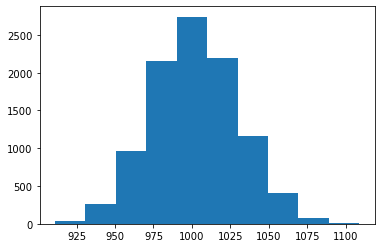

In [58]:
plt.hist(vals)

In [59]:
main_int.mean()

0.03577333333333333